### A notebook used to analyze the responses from the qualtrics survey

In [1]:
#!pip install openpyxl
import pandas as pd

file_path = 'results_survey.xlsx'
df = pd.read_excel(file_path)

columns_to_drop = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 
                   'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 
                   'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
                   'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage']
df_cleaned = df.drop(columns=columns_to_drop)

columns_to_remove = ['bin1', 'bin10']
df_cleaned = df_cleaned.drop(columns=columns_to_remove)
df_cleaned = df_cleaned[:34]
df_cleaned

,qconsent,qagree,q1,q2,q3,q4,q5,q6,q7,q8,...,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,bin24,bin25
0,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...",Attempt to find her in the village,Ask Krogi if he has a spare pair you can borrow,Discuss with neighbors to plan a solution,Decide to head north immediately,Pack thoroughly â€“ nothing will be an obstacl...,"Accept the coat, grateful for the warmth itâ€™...",Invite them to join â€“ the more muscle - the ...,...,1.0,0.0,0.0,1.0,0.0,1.0,1,1.0,1.0,1.0
1,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...","Keep it, planning to look for the owner later",Ask Krogi if he has a spare pair you can borrow,Decide to keep your own stockpile secret for n...,Decide to head north immediately,Pack lightly to travel faster!,Decline â€“ you want to travel lighter and faster,Leave alone to avoid a fight breaking out,...,1.0,1.0,1.0,0.0,1.0,1.0,1,0.0,1.0,1.0
2,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...","Keep it, planning to look for the owner later",Ask Krogi if he has a spare pair you can borrow,Discuss with neighbors to plan a solution,Consult the village elder for advice,Pack thoroughly â€“ nothing will be an obstacl...,"Accept the coat, grateful for the warmth itâ€™...",Invite them to join â€“ the more muscle - the ...,...,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,0.0
3,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...",Attempt to find her in the village,Ask Krogi if he has a spare pair you can borrow,Discuss with neighbors to plan a solution,Consult the village elder for advice,Pack lightly to travel faster!,Decline â€“ you want to travel lighter and faster,Invite them to join â€“ the more muscle - the ...,...,0.0,0.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0
4,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...","Keep it, planning to look for the owner later",Ask Krogi if he has a spare pair you can borrow,Decide to keep your own stockpile secret for n...,Decide to head north immediately,Pack thoroughly â€“ nothing will be an obstacl...,"Accept the coat, grateful for the warmth itâ€™...",Invite them to join â€“ the more muscle - the ...,...,1.0,1.0,1.0,0.0,1.0,1.0,1,1.0,1.0,1.0
5,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...",Attempt to find her in the village,Ask Krogi if he has a spare pair you can borrow,Discuss with neighbors to plan a solution,Consult the village elder for advice,Pack thoroughly â€“ nothing will be an obstacl...,"Accept the coat, grateful for the warmth itâ€™...",Invite them to join â€“ the more muscle - the ...,...,0.0,1.0,0.0,0.0,0.0,1.0,1,1.0,1.0,1.0
6,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...","Keep it, planning to look for the owner later",Ask Krogi if he has a spare pair you can borrow,Decide to keep your own stockpile secret for n...,Decide to head north immediately,Pack lightly to travel faster!,"Accept the coat, grateful for the warmth itâ€™...",Leave alone to avoid a fight breaking out,...,0.0,1.0,1.0,0.0,1.0,1.0,1,0.0,0.0,1.0
7,"I have read the above information,I voluntaril...",Agree,Ask Krogi to help find your shoes,"Keep it, planning to look for the owner later",Ask Krogi if he has a spare pair you can borrow,Discuss with neighbors to plan a solution,Consult the village elder for advice,Pack thoroughly â€“ nothing will be an obstacl...,"Accept the coat, grateful for the warmth itâ€™...",Leave alone to avoid a fight breaking out,...,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,1.0,1.0
8,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...","Keep it, planning to look for the owner later",Try to fix them yours

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define columns for analysis
movie_columns = ["qschindler", "qace", "qspotlight", "qshining", "qinterstellar", "qbutchcassidy"]
personality_columns = ['I', 'S', 'T', 'J']
bin_columns = [col for col in df_cleaned.columns if col.startswith('bin')]
genre_columns = [col for col in df_cleaned.columns if "_avg" in col]    

In [3]:
import pandas as pd

# Define the categorization of bins
categories = ['Trust vs Self-Reliance', 'Altruism vs Ambition', 'Innovation vs Caution', 'Leadership vs Independence', 
              'Risk-Taking vs Prudence', 'Risk-Taking vs Prudence', 'Altruism vs Ambition', 'Leadership vs Independence', 
              'Innovation vs Caution', 'Trust vs Self-Reliance', 'Innovation vs Caution', 'Trust vs Self-Reliance', 
              'Risk-Taking vs Prudence', 'Altruism vs Ambition', 'Leadership vs Independence', 'Risk-Taking vs Prudence', 
              'Innovation vs Caution', 'Risk-Taking vs Prudence', 'Innovation vs Caution', 'Altruism vs Ambition', 
              'Leadership vs Independence', 'Trust vs Self-Reliance', 'Altruism vs Ambition', 'Trust vs Self-Reliance', 
              'Leadership vs Independence']

category_mapping = dict(zip(bin_columns, categories))

category_counts = {cat: categories.count(cat) for cat in set(categories)}

for category in set(categories):
    df_cleaned[f'score_{category.replace(" ", "_")}'] = df_cleaned.apply(lambda row: sum(row[bin_col] for bin_col, cat in category_mapping.items() if cat == category) / category_counts[category], axis=1)

df_cleaned.head()

,qconsent,qagree,q1,q2,q3,q4,q5,q6,q7,q8,...,bin21,bin22,bin23,bin24,bin25,score_Altruism_vs_Ambition,score_Risk-Taking_vs_Prudence,score_Leadership_vs_Independence,score_Trust_vs_Self-Reliance,score_Innovation_vs_Caution
0,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...",Attempt to find her in the village,Ask Krogi if he has a spare pair you can borrow,Discuss with neighbors to plan a solution,Decide to head north immediately,Pack thoroughly â€“ nothing will be an obstacl...,"Accept the coat, grateful for the warmth itâ€™...",Invite them to join â€“ the more muscle - the ...,...,1.0,1,1.0,1.0,1.0,0.8,0.4,0.6,0.6,0.6
1,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...","Keep it, planning to look for the owner later",Ask Krogi if he has a spare pair you can borrow,Decide to keep your own stockpile secret for n...,Decide to head north immediately,Pack lightly to travel faster!,Decline â€“ you want to travel lighter and faster,Leave alone to avoid a fight breaking out,...,1.0,1,0.0,1.0,1.0,0.6,0.8,0.4,0.6,0.6
2,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...","Keep it, planning to look for the owner later",Ask Krogi if he has a spare pair you can borrow,Discuss with neighbors to plan a solution,Consult the village elder for advice,Pack thoroughly â€“ nothing will be an obstacl...,"Accept the coat, grateful for the warmth itâ€™...",Invite them to join â€“ the more muscle - the ...,...,0.0,1,1.0,1.0,0.0,0.6,0.8,0.6,0.6,0.6
3,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...",Attempt to find her in the village,Ask Krogi if he has a spare pair you can borrow,Discuss with neighbors to plan a solution,Consult the village elder for advice,Pack lightly to travel faster!,Decline â€“ you want to travel lighter and faster,Invite them to join â€“ the more muscle - the ...,...,0.0,1,1.0,1.0,1.0,0.6,0.8,0.2,0.6,0.6
4,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...","Keep it, planning to look for the owner later",Ask Krogi if he has a spare pair you can borrow,Decide to keep your own stockpile secret for n...,Decide to head north immediately,Pack thoroughly â€“ nothing will be an obstacl...,"Accept the coat, grateful for the warmth itâ€™...",Invite them to join â€“ the more muscle - the ...,...,1.0,1,1.0,1.0,1.0,0.8,0.8,0.6,0.4,0.4


In [4]:
# n>=32 for 2 tailed tests
# from https://www.semanticscholar.org/paper/Critical-Values-for-Spearman%E2%80%99s-Rank-Order-Ramsey/6cf612d9e65dcfd73afab5da2283f67a2e2beb1d
a05 = 0.05
a10 = 0.10
crit_val_005 = 0.350
crit_val_010 = 0.296

In [5]:
from scipy.stats import spearmanr

def test_hypotheses(cols1, cols2, alpha=a05, crit_val=crit_val_005):
    for col1 in cols1:
        for col2 in cols2:
            corr, p_value = spearmanr(df_cleaned[col1], df_cleaned[col2])
            result = "Passed" if p_value < alpha and abs(corr) > crit_val else "Failed"
            if result == "Passed":
                print(f'Spearman correlation between {col1} and {col2}: {corr:.2f}, p-value: {p_value:.4f} ({result}, alpha = {alpha})')

In [6]:
score_columns = [f'score_{cat.replace(" ", "_")}' for cat in set(categories)]

Each hypothesis will be tested twice for two different Type I error probabilities (keep in mind we have 34 participants meaning 32 dof):
- alpha = 0.05 => critical value = 0.350
- alpha = 0.10 => critical value = 0.296
 
 
 
- the values are for 2-tailed tests since we also want to know whether the personality traits influence the movie choices in any direction (positive or negative)

In [7]:
def highlight_heatmap(df, columns1, columns2, title, threshold=0.35):
    selected_columns = columns1 + columns2
    corr_matrix = df[selected_columns].corr(method='spearman')

    plt.figure(figsize=(14, 10))
    heatmap = sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')

    # Highlight cells above the threshold and not self-correlations
    for i in range(len(columns1)):
        for j in range(len(columns1), len(selected_columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                heatmap.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=3))

    plt.title(title)
    plt.show()


Hypothesis 1: Correlation between personality type according to 16personalities (MBTI) and movie ratings; alpha = 0.05

Spearman correlation between S and scifi_avg: -0.38, p-value: 0.0286 (Passed, alpha = 0.05)


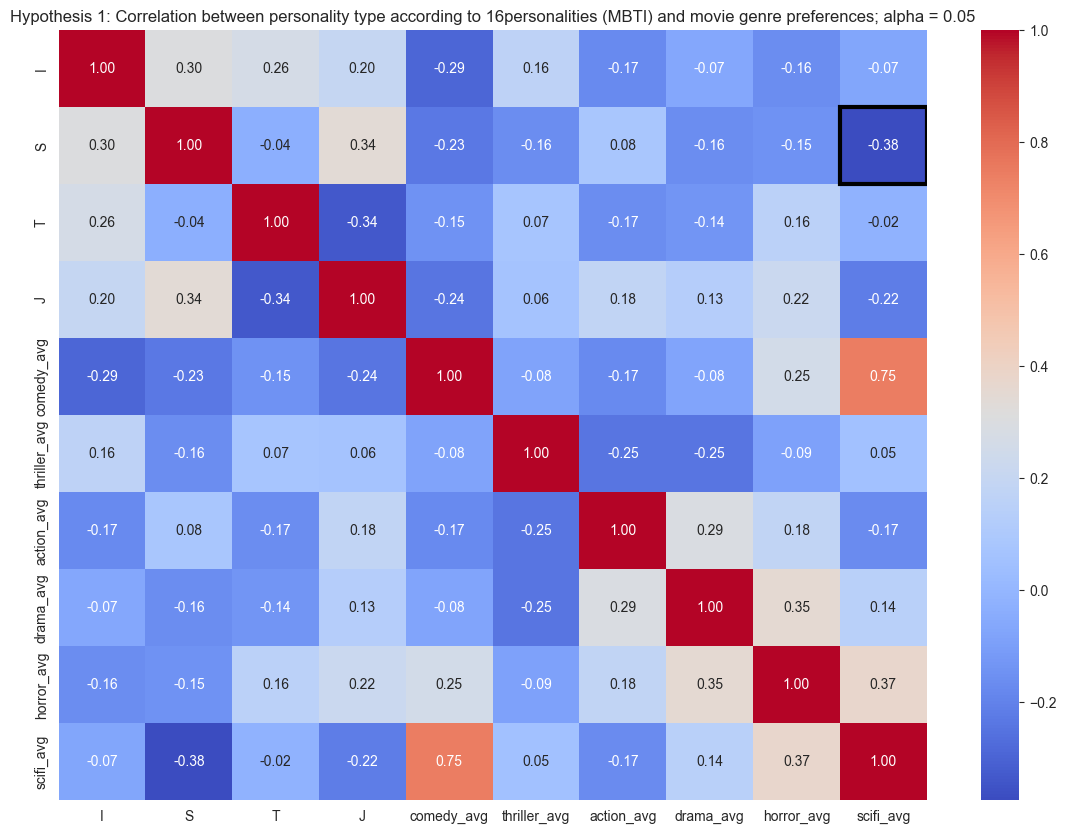

In [8]:
print("\nHypothesis 1: Correlation between personality type according to 16personalities (MBTI) and movie ratings; alpha = 0.05\n")
test_hypotheses(personality_columns, genre_columns)
highlight_heatmap(df_cleaned, personality_columns, genre_columns, "Hypothesis 1: Correlation between personality type according to 16personalities (MBTI) and movie genre preferences; alpha = 0.05", threshold=crit_val_005)


Hypothesis 1: Correlation between personality type according to 16personalities (MBTI) and movie genre preferences; alpha = 0.10

Spearman correlation between S and scifi_avg: -0.38, p-value: 0.0286 (Passed, alpha = 0.1)


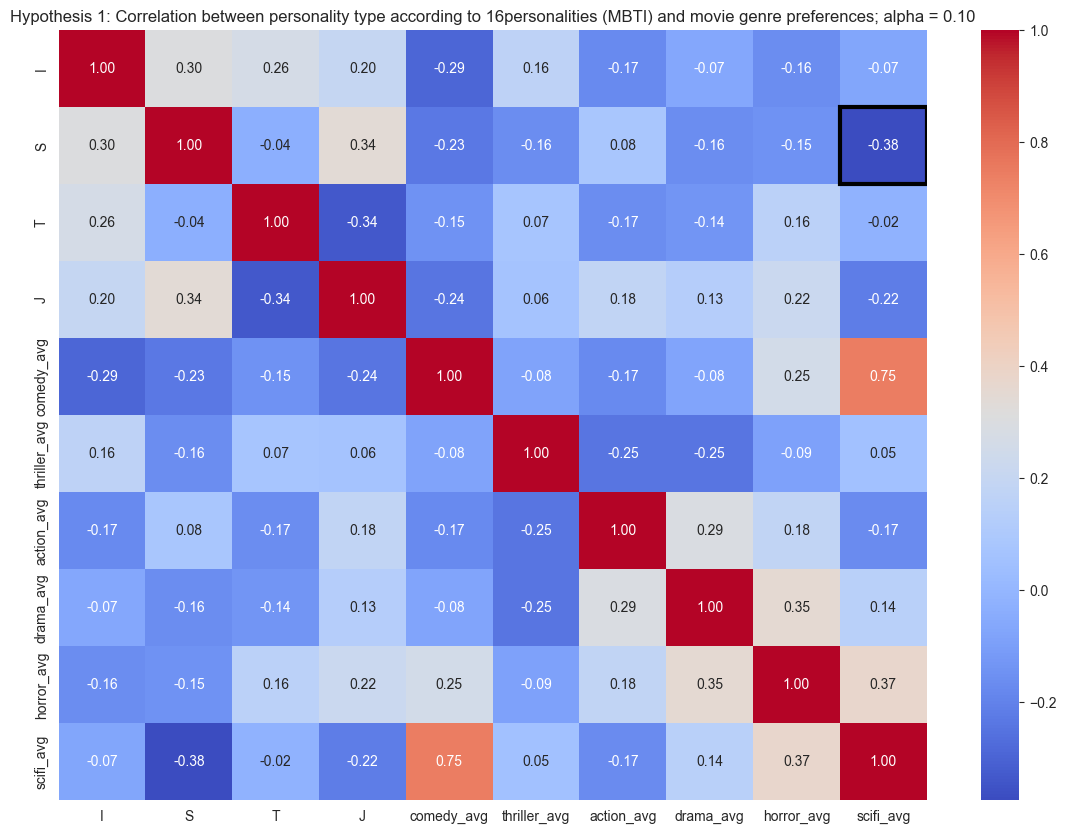

In [9]:
print("\nHypothesis 1: Correlation between personality type according to 16personalities (MBTI) and movie genre preferences; alpha = 0.10\n")
test_hypotheses(personality_columns, genre_columns, alpha=a10, crit_val=crit_val_010)
highlight_heatmap(df_cleaned, personality_columns, genre_columns, "Hypothesis 1: Correlation between personality type according to 16personalities (MBTI) and movie genre preferences; alpha = 0.10", threshold=crit_val_010)


 Hypothesis 2: Correlation between Personality Aspect Scores derived from text-based game scenarios and Movie Genre preferences; alpha = 0.05

Spearman correlation between score_Altruism_vs_Ambition and scifi_avg: -0.39, p-value: 0.0211 (Passed, alpha = 0.05)
Spearman correlation between score_Leadership_vs_Independence and scifi_avg: -0.36, p-value: 0.0352 (Passed, alpha = 0.05)


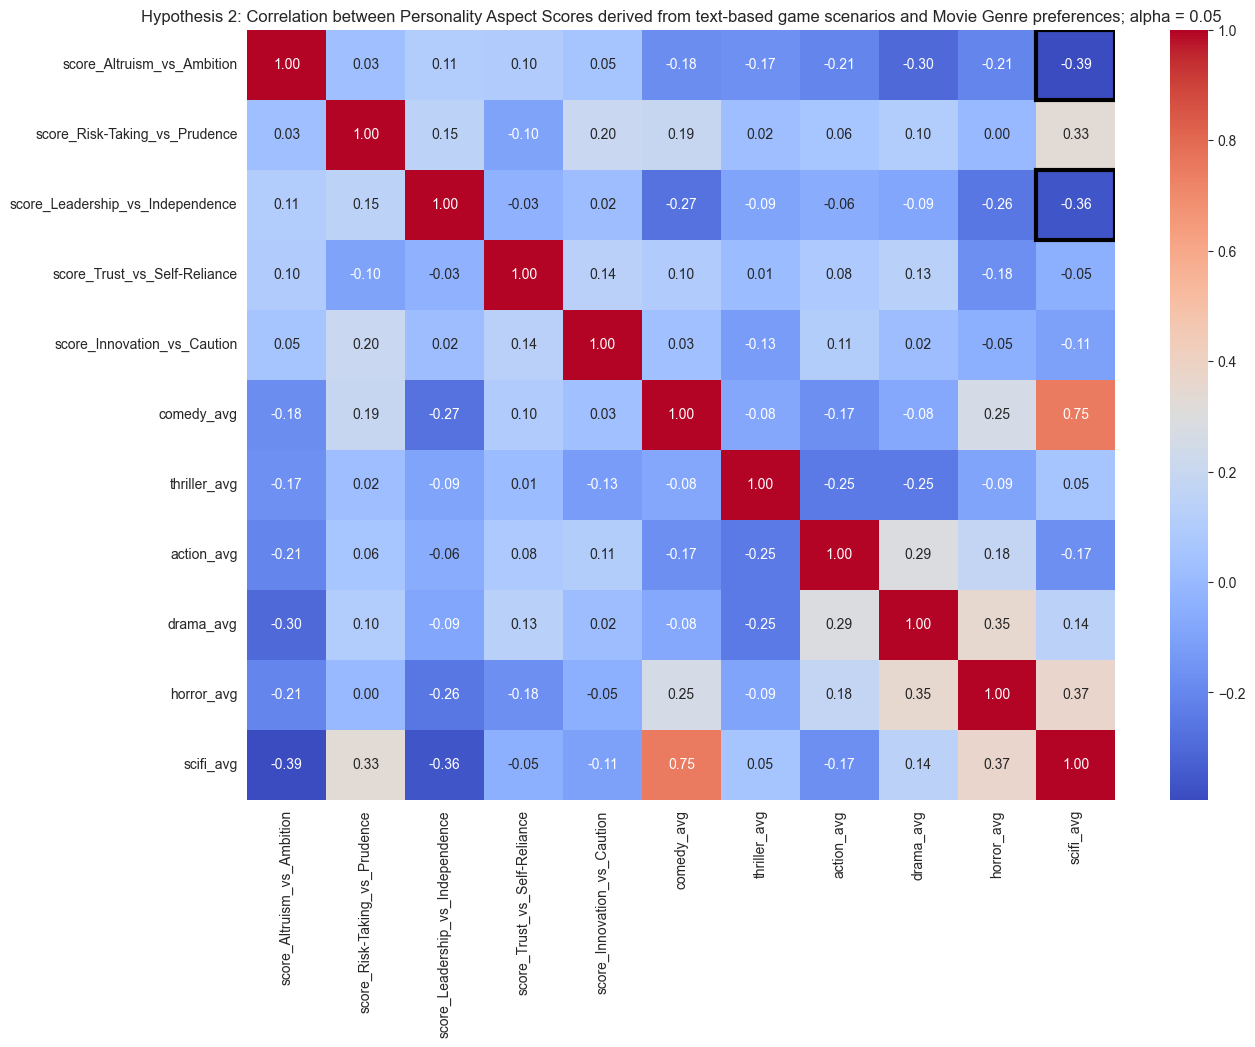

In [10]:
print("\n Hypothesis 2: Correlation between Personality Aspect Scores derived from text-based game scenarios and Movie Genre preferences; alpha = 0.05\n")
test_hypotheses(score_columns, genre_columns)
highlight_heatmap(df_cleaned, score_columns, genre_columns, "Hypothesis 2: Correlation between Personality Aspect Scores derived from text-based game scenarios and Movie Genre preferences; alpha = 0.05", threshold=crit_val_005)


 Hypothesis 2: Correlation between Personality Aspect Scores derived from text-based game scenarios and Movie Genre preferences; alpha = 0.10

Spearman correlation between score_Altruism_vs_Ambition and drama_avg: -0.30, p-value: 0.0835 (Passed, alpha = 0.1)
Spearman correlation between score_Altruism_vs_Ambition and scifi_avg: -0.39, p-value: 0.0211 (Passed, alpha = 0.1)
Spearman correlation between score_Risk-Taking_vs_Prudence and scifi_avg: 0.33, p-value: 0.0564 (Passed, alpha = 0.1)
Spearman correlation between score_Leadership_vs_Independence and scifi_avg: -0.36, p-value: 0.0352 (Passed, alpha = 0.1)


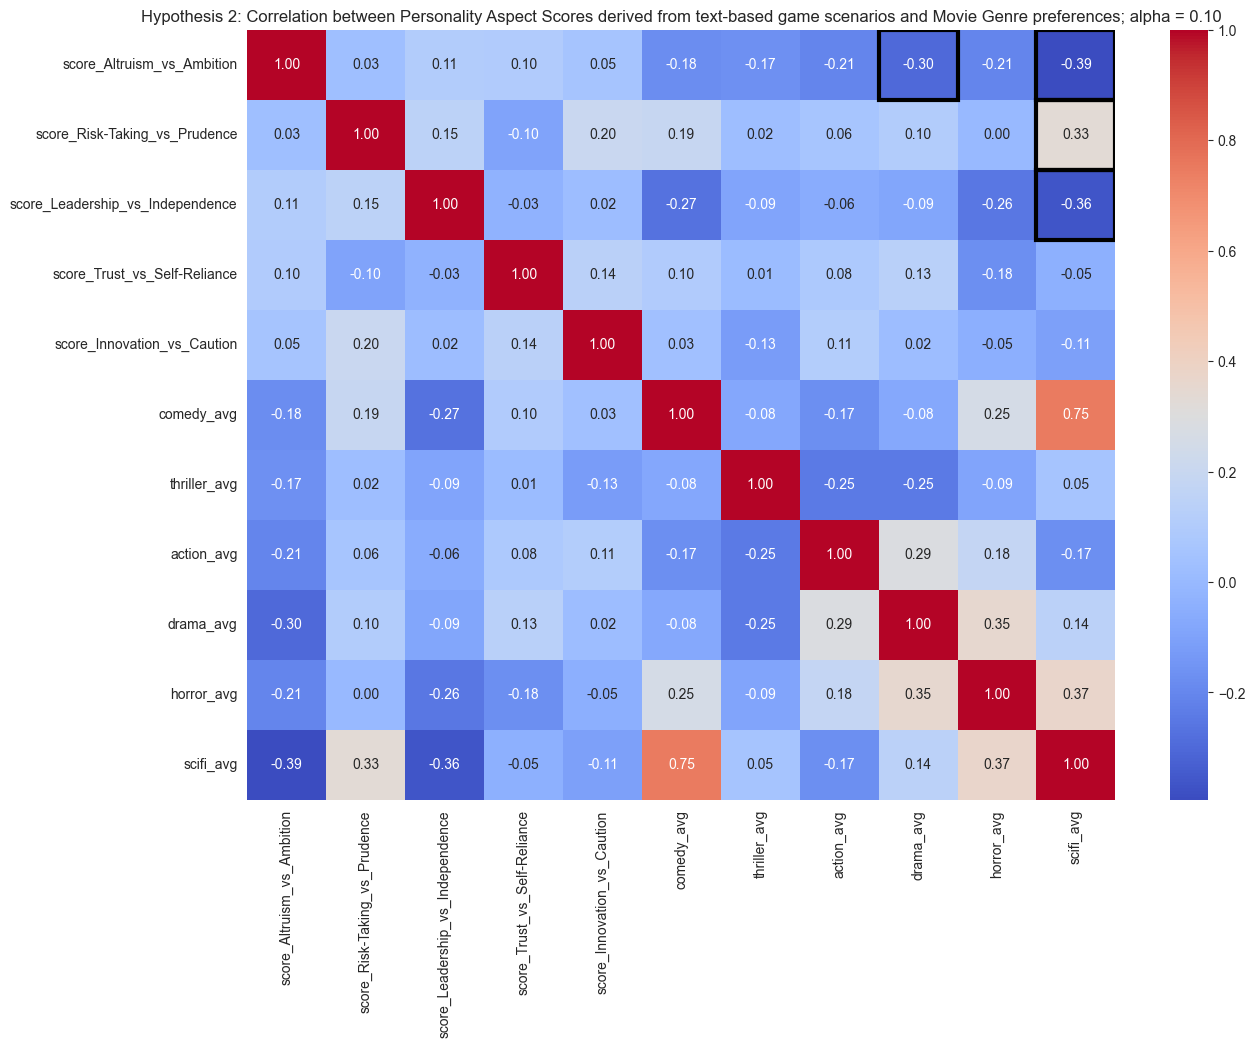

In [11]:
print("\n Hypothesis 2: Correlation between Personality Aspect Scores derived from text-based game scenarios and Movie Genre preferences; alpha = 0.10\n")
test_hypotheses(score_columns, genre_columns, alpha=a10, crit_val=crit_val_010)
highlight_heatmap(df_cleaned, score_columns, genre_columns, "Hypothesis 2: Correlation between Personality Aspect Scores derived from text-based game scenarios and Movie Genre preferences; alpha = 0.10", threshold=crit_val_010)


 Hypothesis 3: Correlation between Personality Aspect Scores derived from text-based game scenarios and personality type according to 16personalities (MBTI); alpha = 0.05

Spearman correlation between score_Risk-Taking_vs_Prudence and J: -0.36, p-value: 0.0343 (Passed, alpha = 0.05)
Spearman correlation between score_Leadership_vs_Independence and I: 0.50, p-value: 0.0028 (Passed, alpha = 0.05)


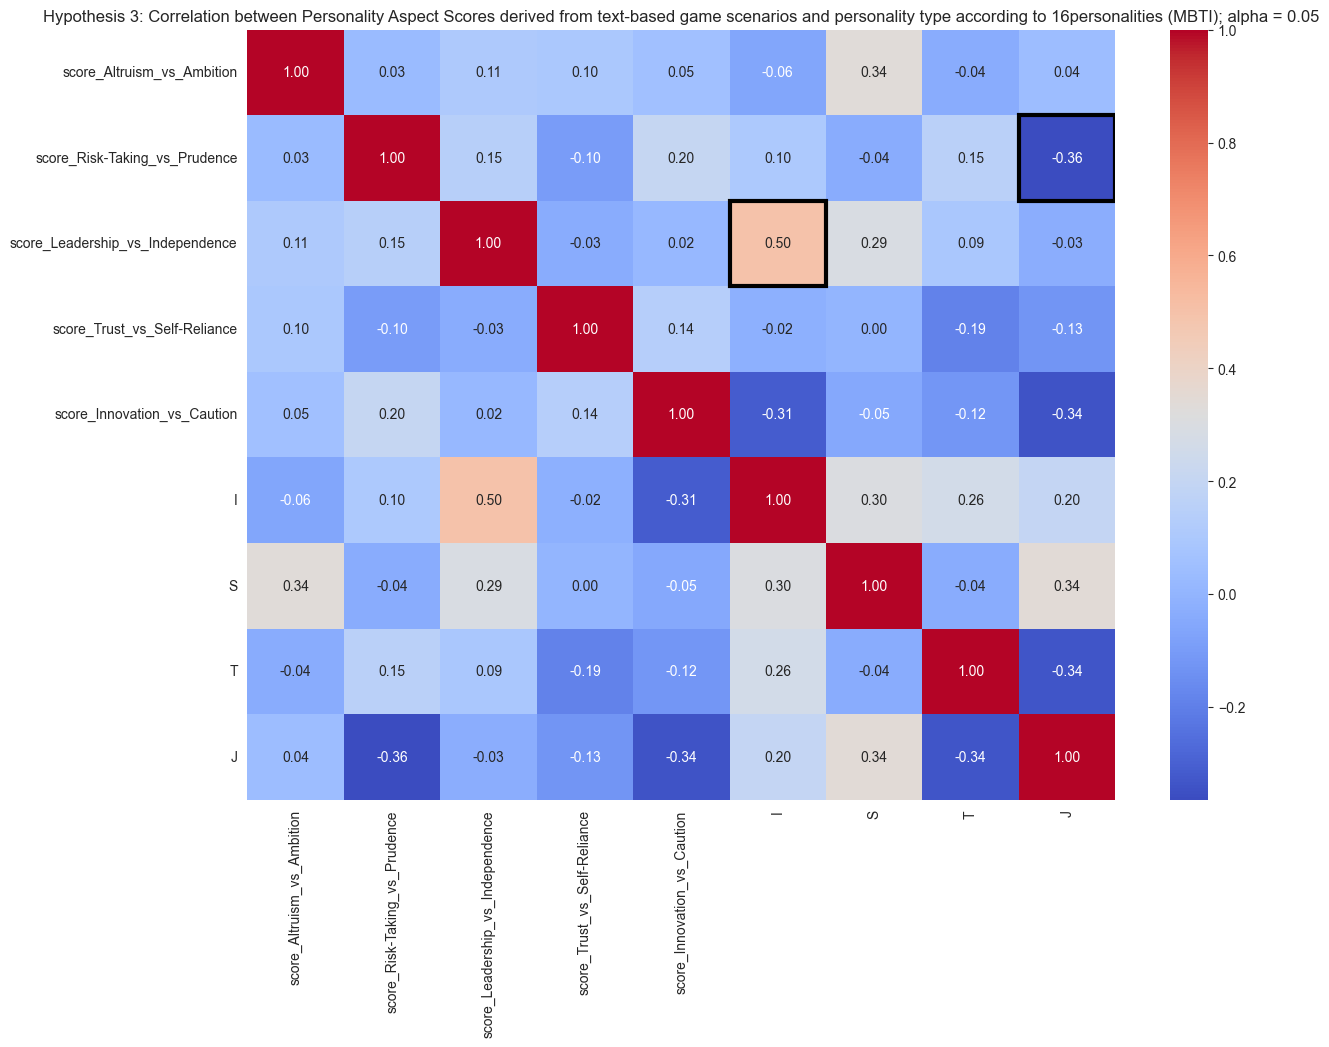

In [12]:
print("\n Hypothesis 3: Correlation between Personality Aspect Scores derived from text-based game scenarios and personality type according to 16personalities (MBTI); alpha = 0.05\n")
test_hypotheses(score_columns, personality_columns)
highlight_heatmap(df_cleaned, score_columns, personality_columns, "Hypothesis 3: Correlation between Personality Aspect Scores derived from text-based game scenarios and personality type according to 16personalities (MBTI); alpha = 0.05", threshold=crit_val_005)


 Hypothesis 3: Correlation between Personality Aspect Scores derived from text-based game scenarios and personality type according to 16personalities (MBTI); alpha = 0.10

Spearman correlation between score_Altruism_vs_Ambition and S: 0.34, p-value: 0.0504 (Passed, alpha = 0.1)
Spearman correlation between score_Risk-Taking_vs_Prudence and J: -0.36, p-value: 0.0343 (Passed, alpha = 0.1)
Spearman correlation between score_Leadership_vs_Independence and I: 0.50, p-value: 0.0028 (Passed, alpha = 0.1)
Spearman correlation between score_Innovation_vs_Caution and I: -0.31, p-value: 0.0705 (Passed, alpha = 0.1)
Spearman correlation between score_Innovation_vs_Caution and J: -0.34, p-value: 0.0474 (Passed, alpha = 0.1)


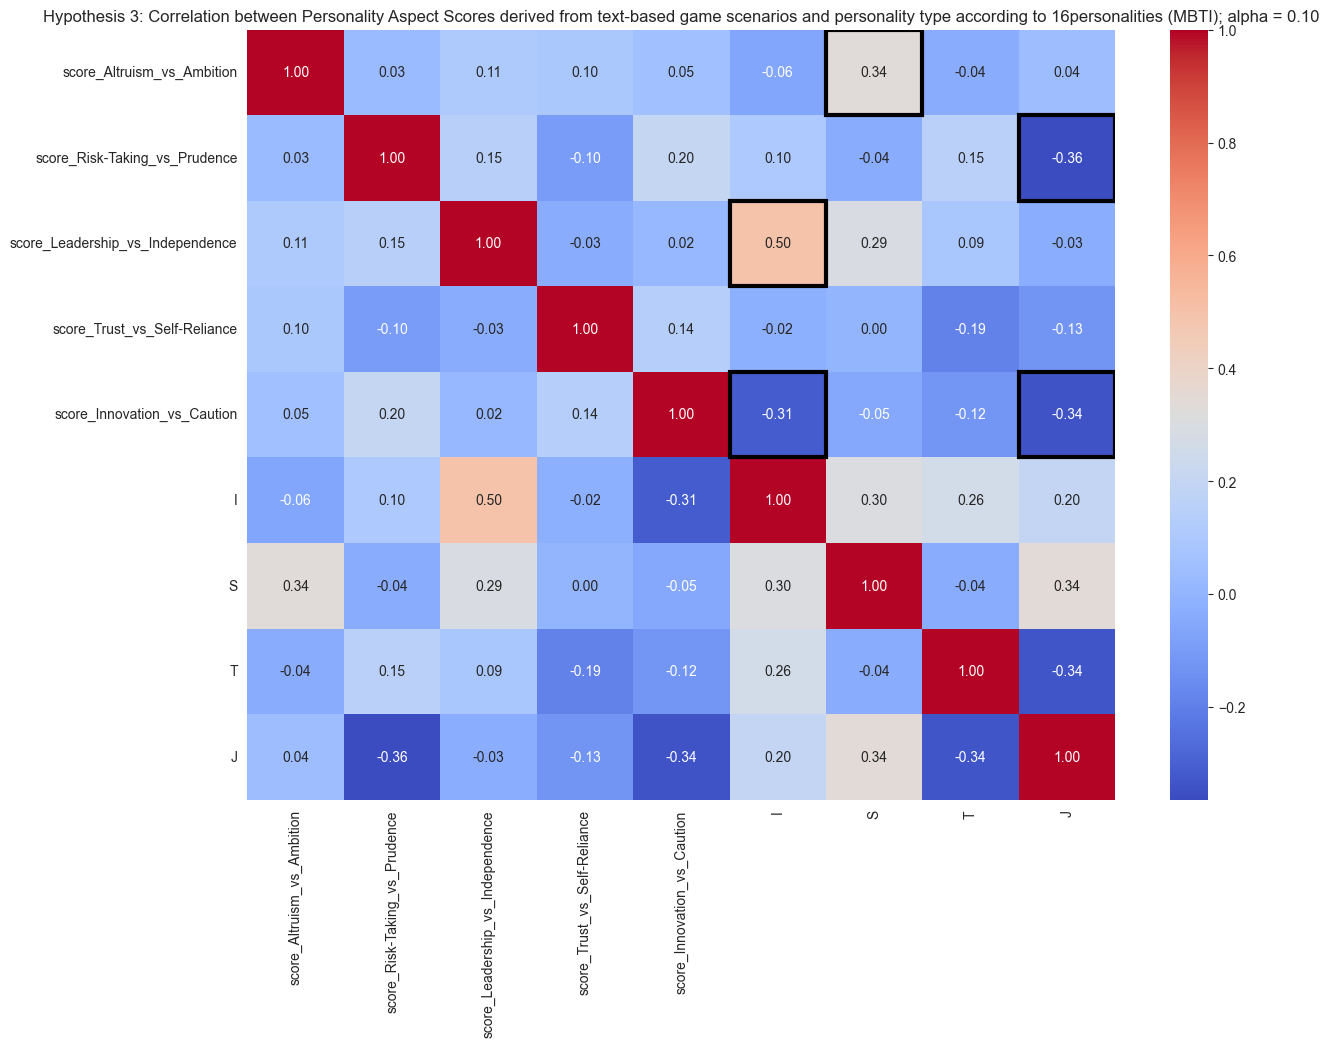

In [13]:
print("\n Hypothesis 3: Correlation between Personality Aspect Scores derived from text-based game scenarios and personality type according to 16personalities (MBTI); alpha = 0.10\n")
test_hypotheses(score_columns, personality_columns, alpha=a10, crit_val=crit_val_010)
highlight_heatmap(df_cleaned, score_columns, personality_columns, "Hypothesis 3: Correlation between Personality Aspect Scores derived from text-based game scenarios and personality type according to 16personalities (MBTI); alpha = 0.10", threshold=crit_val_010)


Hypothesis 4a: Correlation between personality type according to 16personalities (MBTI) and Movie Genre preferences; alpha = 0.05

Spearman correlation between S and scifi_avg: -0.38, p-value: 0.0286 (Passed, alpha = 0.05)


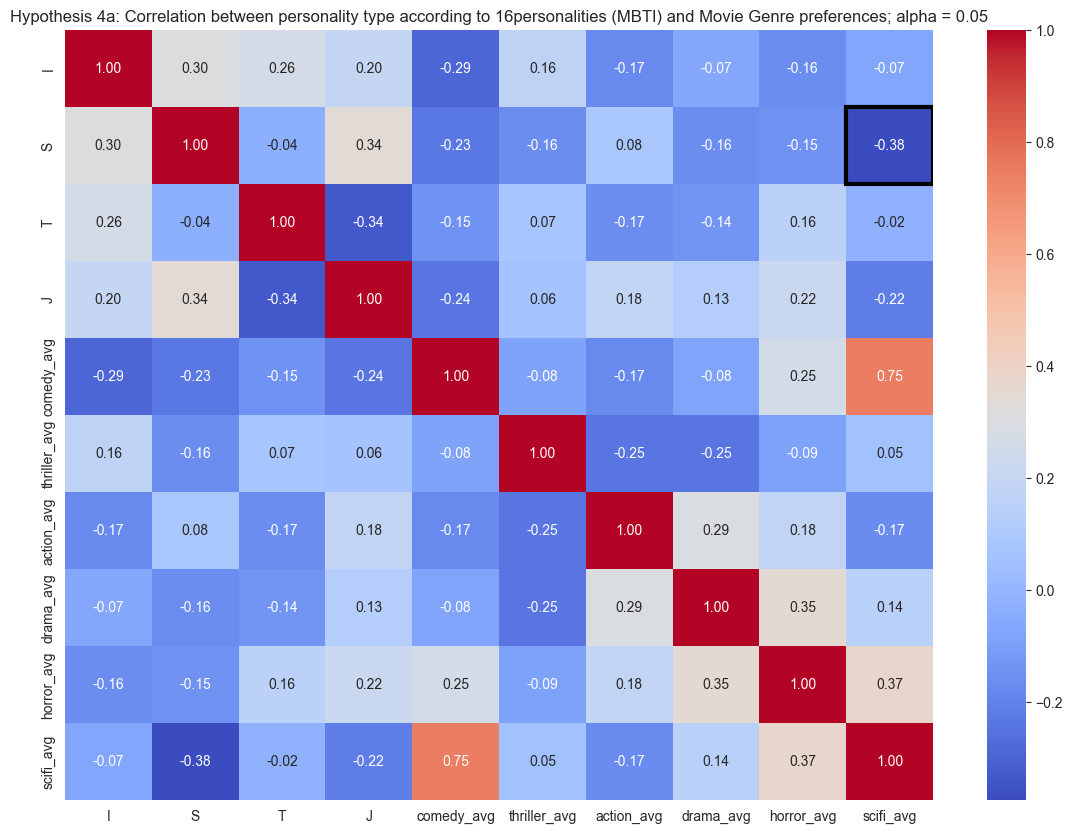

In [14]:
print("\nHypothesis 4a: Correlation between personality type according to 16personalities (MBTI) and Movie Genre preferences; alpha = 0.05\n")
test_hypotheses(personality_columns, genre_columns)
highlight_heatmap(df_cleaned, personality_columns, genre_columns, "Hypothesis 4a: Correlation between personality type according to 16personalities (MBTI) and Movie Genre preferences; alpha = 0.05", threshold=crit_val_005)


Hypothesis 4a: Correlation between personality type according to 16personalities (MBTI) and Movie Genre preferences; alpha = 0.10

Spearman correlation between S and scifi_avg: -0.38, p-value: 0.0286 (Passed, alpha = 0.1)


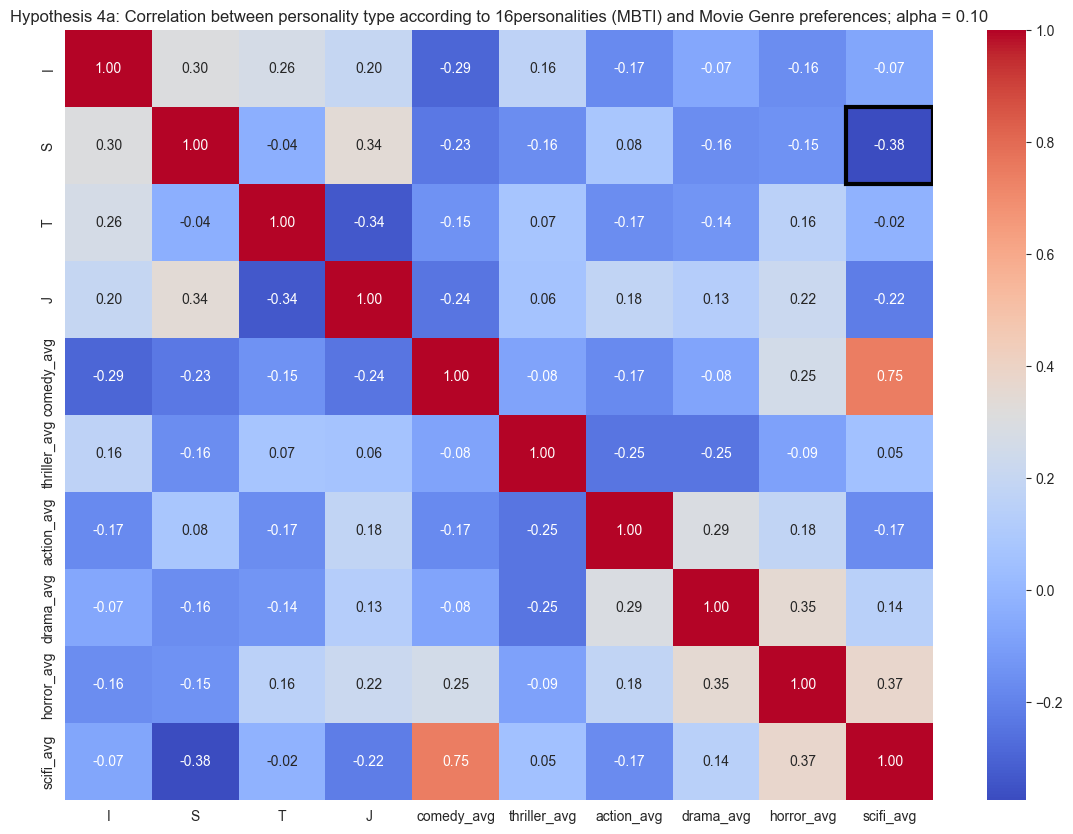

In [15]:
print("\nHypothesis 4a: Correlation between personality type according to 16personalities (MBTI) and Movie Genre preferences; alpha = 0.10\n")
test_hypotheses(personality_columns, genre_columns, alpha=a10, crit_val=crit_val_010)
highlight_heatmap(df_cleaned, personality_columns, genre_columns, "Hypothesis 4a: Correlation between personality type according to 16personalities (MBTI) and Movie Genre preferences; alpha = 0.10", threshold=crit_val_010)


Hypothesis 4b: Correlation between Personality Aspect Scores derived from text-based game scenarios and Movie Genre preferences; alpha = 0.05

Spearman correlation between score_Altruism_vs_Ambition and scifi_avg: -0.39, p-value: 0.0211 (Passed, alpha = 0.05)
Spearman correlation between score_Leadership_vs_Independence and scifi_avg: -0.36, p-value: 0.0352 (Passed, alpha = 0.05)


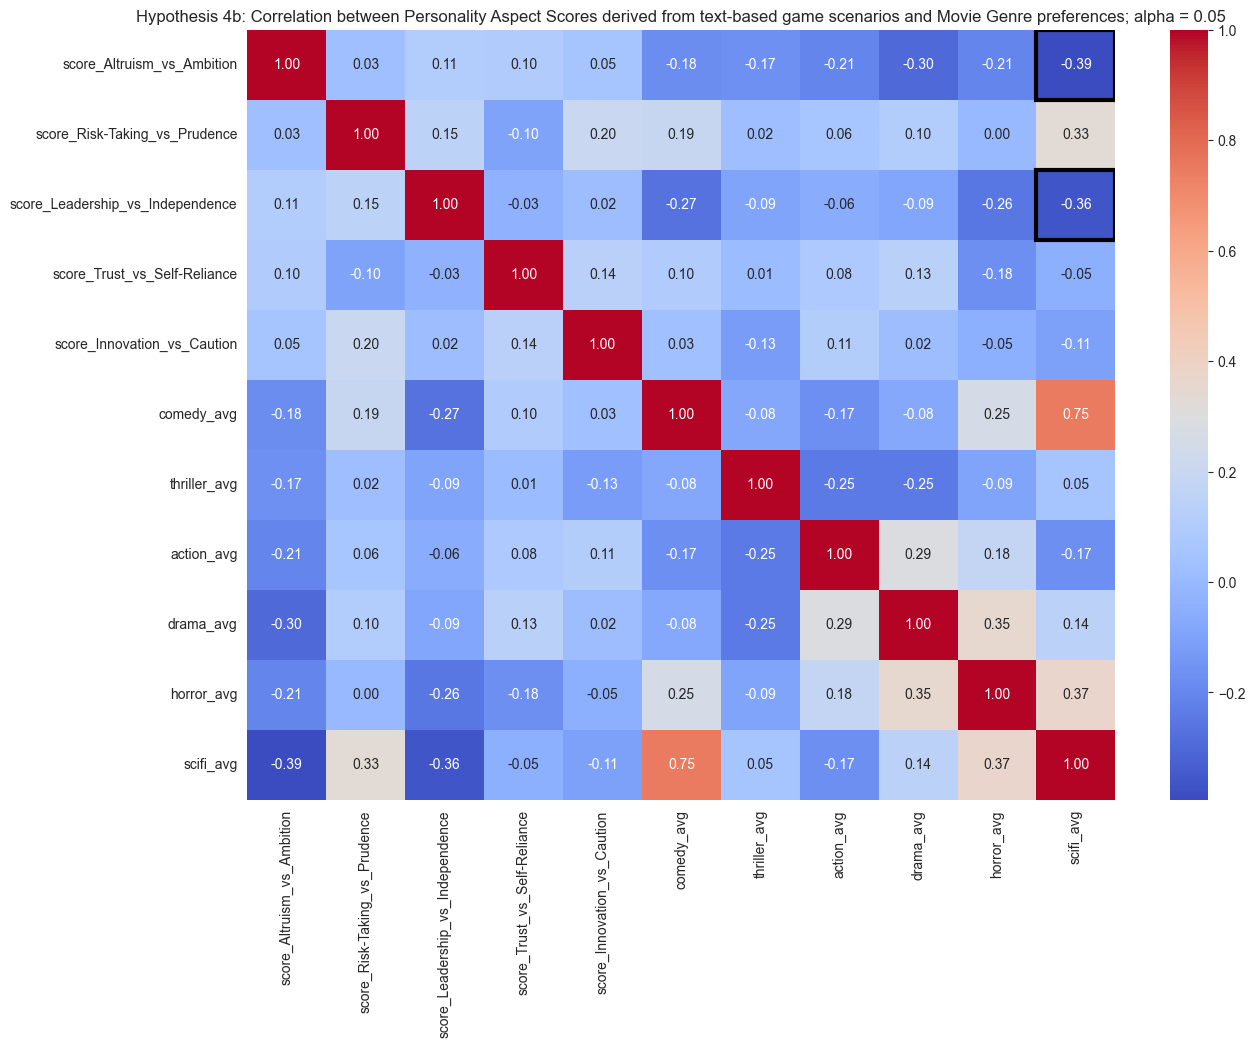

In [16]:
print("\nHypothesis 4b: Correlation between Personality Aspect Scores derived from text-based game scenarios and Movie Genre preferences; alpha = 0.05\n")
test_hypotheses(score_columns, genre_columns)
highlight_heatmap(df_cleaned, score_columns, genre_columns, "Hypothesis 4b: Correlation between Personality Aspect Scores derived from text-based game scenarios and Movie Genre preferences; alpha = 0.05", threshold=crit_val_005)


Hypothesis 4b: Correlation between Personality Aspect Scores derived from text-based game scenarios and Movie Genre preferences; alpha = 0.10

Spearman correlation between score_Altruism_vs_Ambition and drama_avg: -0.30, p-value: 0.0835 (Passed, alpha = 0.1)
Spearman correlation between score_Altruism_vs_Ambition and scifi_avg: -0.39, p-value: 0.0211 (Passed, alpha = 0.1)
Spearman correlation between score_Risk-Taking_vs_Prudence and scifi_avg: 0.33, p-value: 0.0564 (Passed, alpha = 0.1)
Spearman correlation between score_Leadership_vs_Independence and scifi_avg: -0.36, p-value: 0.0352 (Passed, alpha = 0.1)


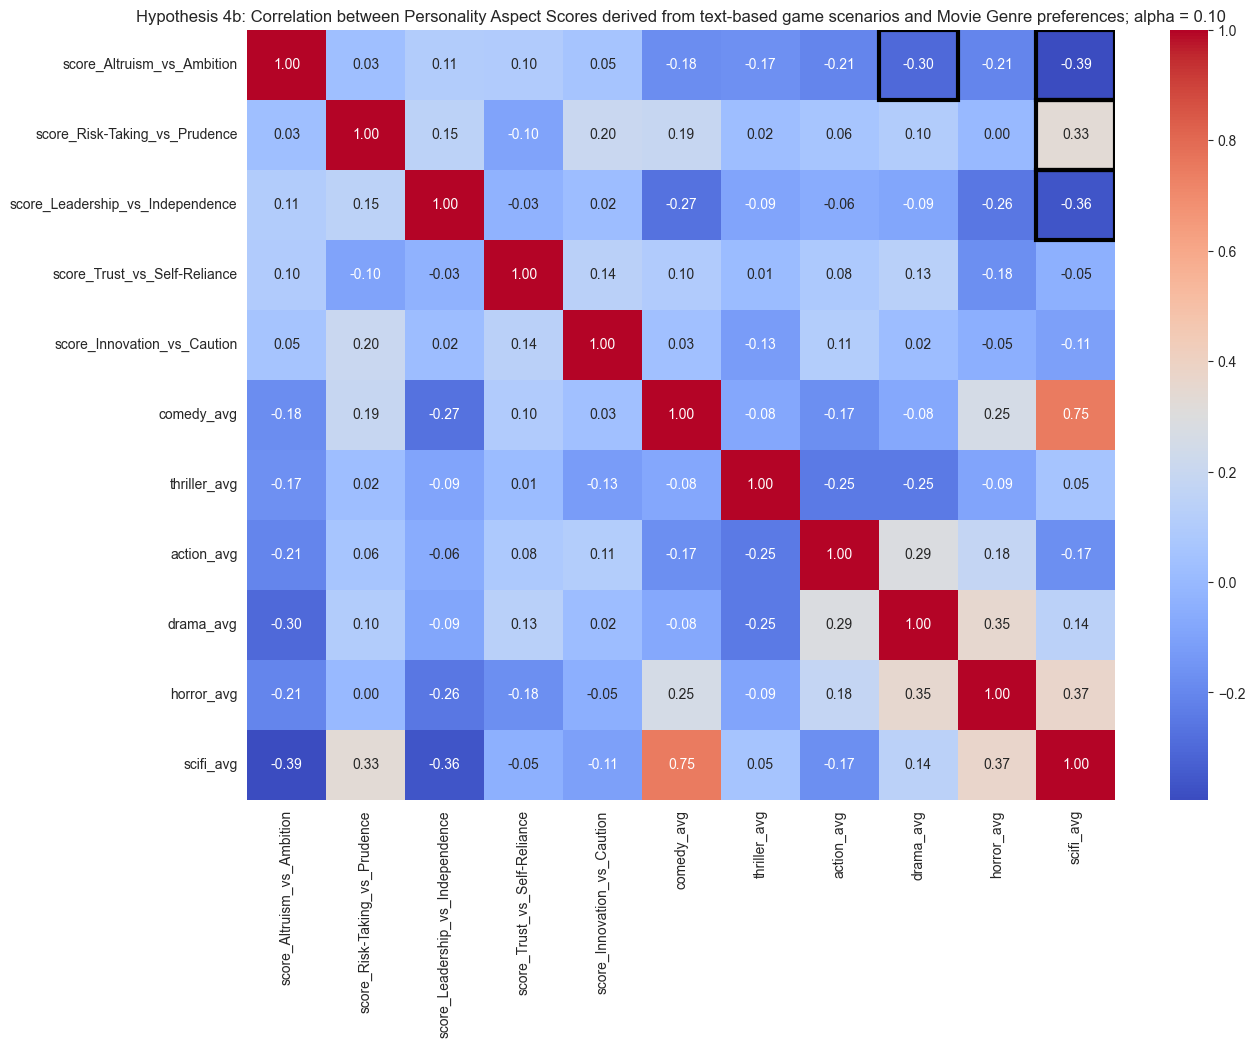

In [17]:
print("\nHypothesis 4b: Correlation between Personality Aspect Scores derived from text-based game scenarios and Movie Genre preferences; alpha = 0.10\n")
test_hypotheses(score_columns, genre_columns, alpha=a10, crit_val=crit_val_010)
highlight_heatmap(df_cleaned, score_columns, genre_columns, "Hypothesis 4b: Correlation between Personality Aspect Scores derived from text-based game scenarios and Movie Genre preferences; alpha = 0.10", threshold=crit_val_010)

In [18]:
df_cleaned

,qconsent,qagree,q1,q2,q3,q4,q5,q6,q7,q8,...,bin21,bin22,bin23,bin24,bin25,score_Altruism_vs_Ambition,score_Risk-Taking_vs_Prudence,score_Leadership_vs_Independence,score_Trust_vs_Self-Reliance,score_Innovation_vs_Caution
0,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...",Attempt to find her in the village,Ask Krogi if he has a spare pair you can borrow,Discuss with neighbors to plan a solution,Decide to head north immediately,Pack thoroughly â€“ nothing will be an obstacl...,"Accept the coat, grateful for the warmth itâ€™...",Invite them to join â€“ the more muscle - the ...,...,1.0,1,1.0,1.0,1.0,0.8,0.4,0.6,0.6,0.6
1,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...","Keep it, planning to look for the owner later",Ask Krogi if he has a spare pair you can borrow,Decide to keep your own stockpile secret for n...,Decide to head north immediately,Pack lightly to travel faster!,Decline â€“ you want to travel lighter and faster,Leave alone to avoid a fight breaking out,...,1.0,1,0.0,1.0,1.0,0.6,0.8,0.4,0.6,0.6
2,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...","Keep it, planning to look for the owner later",Ask Krogi if he has a spare pair you can borrow,Discuss with neighbors to plan a solution,Consult the village elder for advice,Pack thoroughly â€“ nothing will be an obstacl...,"Accept the coat, grateful for the warmth itâ€™...",Invite them to join â€“ the more muscle - the ...,...,0.0,1,1.0,1.0,0.0,0.6,0.8,0.6,0.6,0.6
3,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...",Attempt to find her in the village,Ask Krogi if he has a spare pair you can borrow,Discuss with neighbors to plan a solution,Consult the village elder for advice,Pack lightly to travel faster!,Decline â€“ you want to travel lighter and faster,Invite them to join â€“ the more muscle - the ...,...,0.0,1,1.0,1.0,1.0,0.6,0.8,0.2,0.6,0.6
4,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...","Keep it, planning to look for the owner later",Ask Krogi if he has a spare pair you can borrow,Decide to keep your own stockpile secret for n...,Decide to head north immediately,Pack thoroughly â€“ nothing will be an obstacl...,"Accept the coat, grateful for the warmth itâ€™...",Invite them to join â€“ the more muscle - the ...,...,1.0,1,1.0,1.0,1.0,0.8,0.8,0.6,0.4,0.4
5,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...",Attempt to find her in the village,Ask Krogi if he has a spare pair you can borrow,Discuss with neighbors to plan a solution,Consult the village elder for advice,Pack thoroughly â€“ nothing will be an obstacl...,"Accept the coat, grateful for the warmth itâ€™...",Invite them to join â€“ the more muscle - the ...,...,1.0,1,1.0,1.0,1.0,0.6,0.2,0.4,0.8,0.4
6,"I have read the above information,I voluntaril...",Agree,"Look around some more for your shoes, they mus...","Keep it, planning to look for the owner later",Ask Krogi if he has a spare pair you can borrow,Decide to keep your own stockpile secret for n...,Decide to head north immediately,Pack lightly to travel faster!,"Accept the coat, grateful for the warmth itâ€™...",Leave alone to avoid a fight breaking out,...,1.0,1,0.0,0.0,1.0,0.4,1.0,0.4,0.2,0.4
7,"I have read the above information,I voluntaril...",Agree,Ask Krogi to help find your shoes,"Keep it, planning to look for the owner later",Ask Krogi if he has a spare pair you can borrow,Discuss with neighbors to plan a solution,Consult the village elder for advice,Pack thoroughly â€“ nothing will be an obstacl...,"Accept the coat, grateful for the warmth itâ€™...",Leave alone to avoid a fight breaking out,...,1.0,0,1.0,1.0,1.0,0.4,0.8,0.4,0.4,0.8
8,"I have read the above information,I voluntaril...",Agree,"Loo

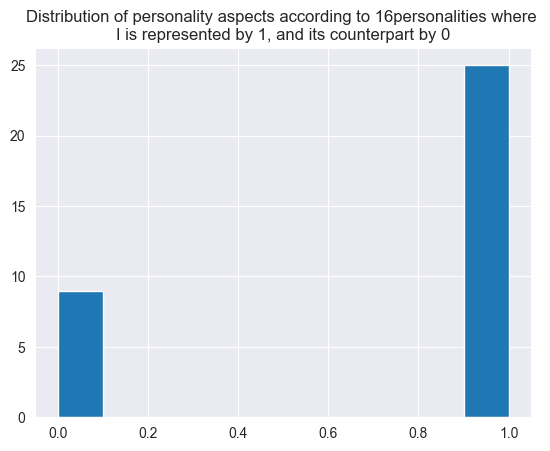

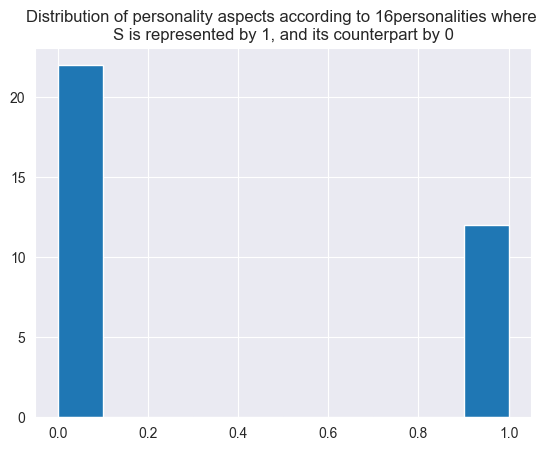

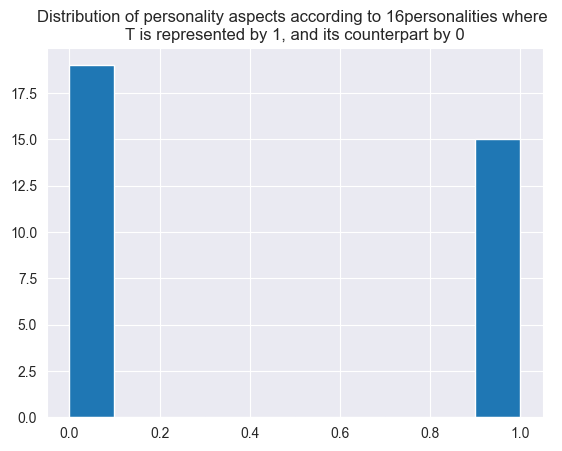

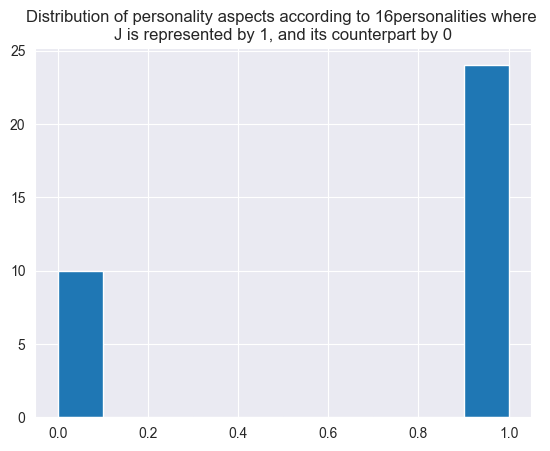

In [19]:
import matplotlib.pyplot as plt
for x in ["I", "S", "T", "J"]:
    plt.hist(df_cleaned[x])
    plt.title(f"Distribution of personality aspects according to 16personalities where \n{x} is represented by 1, and its counterpart by 0")
    plt.show()

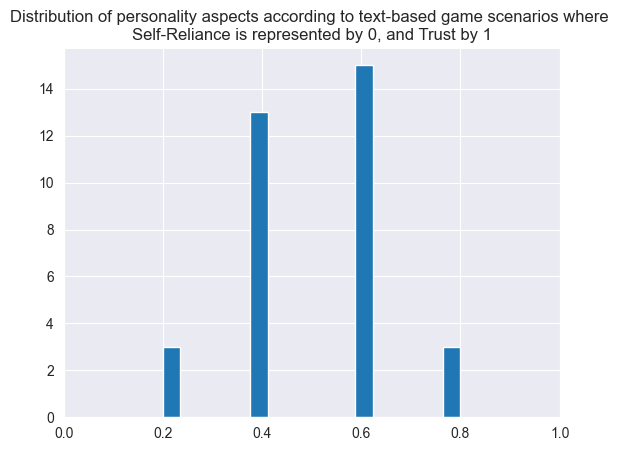

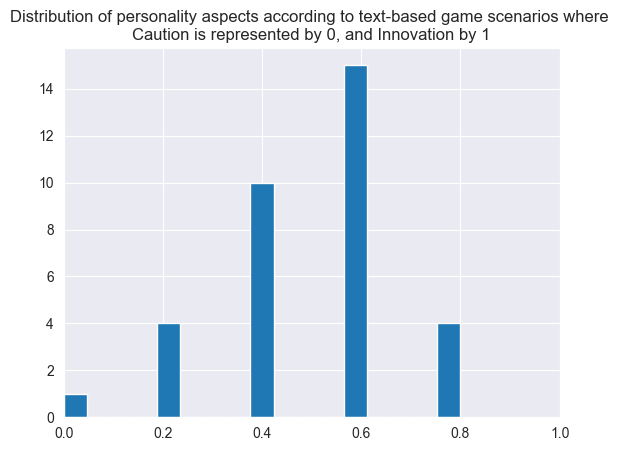

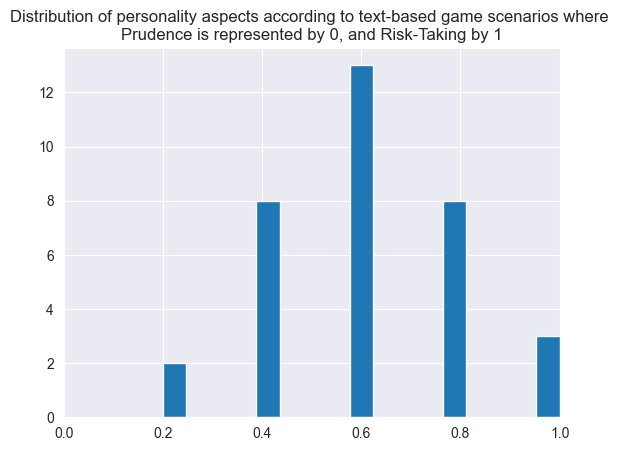

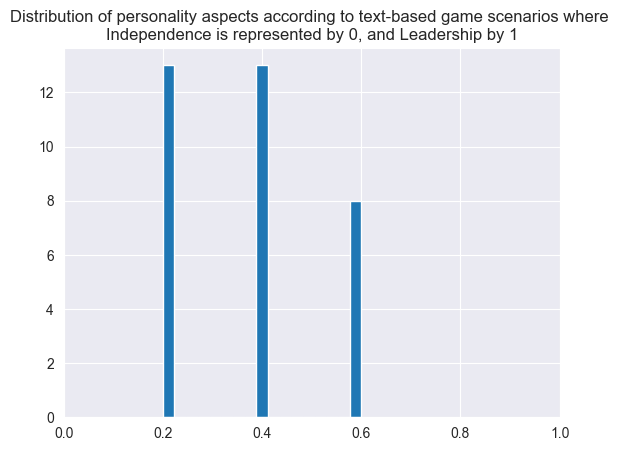

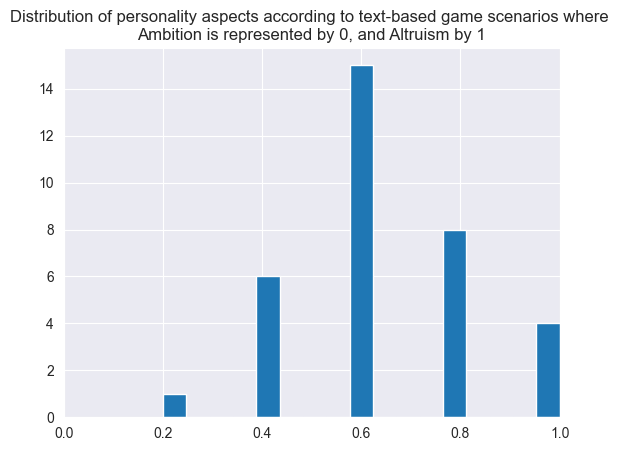

In [20]:
import matplotlib.pyplot as plt
for x in ["score_Trust_vs_Self-Reliance", "score_Innovation_vs_Caution", "score_Risk-Taking_vs_Prudence", "score_Leadership_vs_Independence", "score_Altruism_vs_Ambition"]:
    plt.hist(df_cleaned[x], bins=17)
    plt.title(f"Distribution of personality aspects according to text-based game scenarios where \n{x.split("_vs_")[1]} is represented by 0, and {x.split("_vs_")[0].split("score_")[1]} by 1")
    plt.xlim(0,1)
    plt.show()

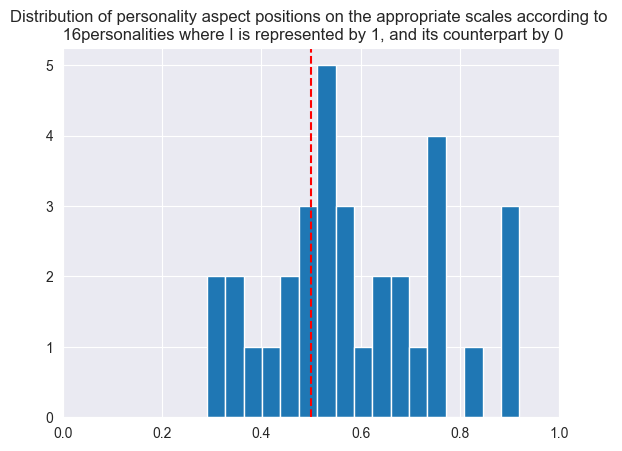

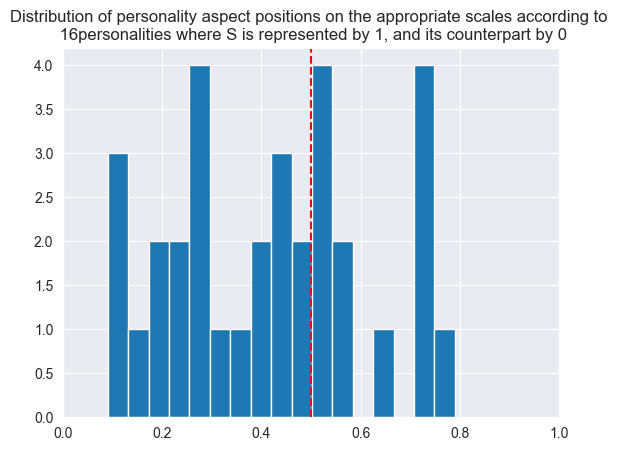

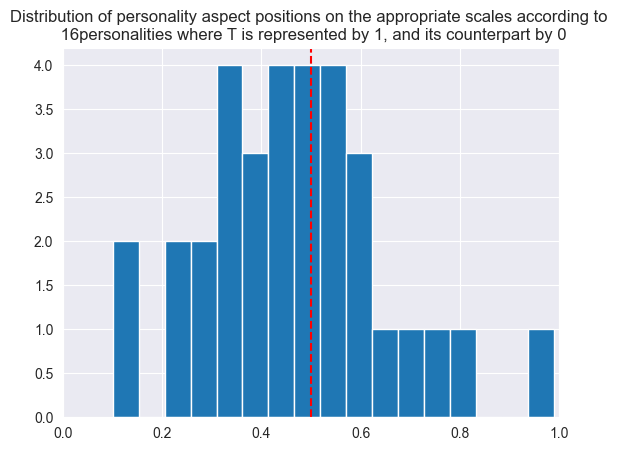

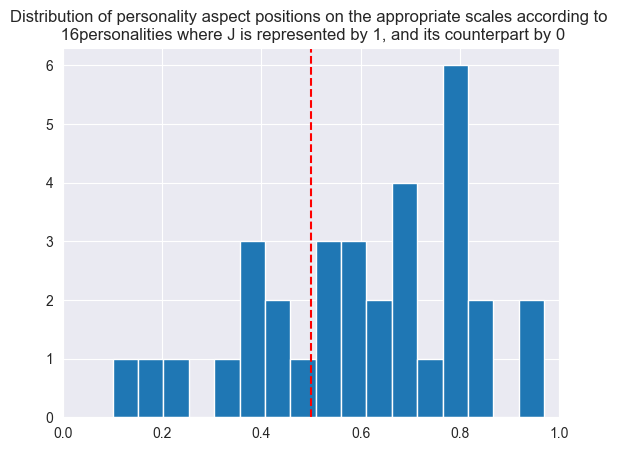

In [21]:
import matplotlib.pyplot as plt

for x in ["I", "S", "T","J"]:
    plt.hist(df_cleaned[x+"_website"]/100, bins=17)
    plt.axvline(x=.5, color="r", linestyle="--")
    plt.title(f"Distribution of personality aspect positions on the appropriate scales according to \n 16personalities where {x} is represented by 1, and its counterpart by 0")
    plt.xlim(0, 1)
    plt.show()